#### Изучим общую информацию и обработаем данные:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from matplotlib.ticker import FuncFormatter

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [4]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


#### Проверим на наличие пропусков и дубликатов:

In [5]:
print(rest.isnull().sum())

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


In [6]:
rest.duplicated().sum() 

0

Пропусков и дубликатов в данных не обнаружено

#### Проверим на корректность данных:

###### Рассмотрим столбец object_name:
Cразу в глаза бросается, что назване записаны в разных регистрах, что может создать проблемы в дальнейм, поэтому привидем все данные к нижнему регистру 

In [7]:
rest['object_name'] = rest['object_name'].str.lower() 

Также можно заметить, что название одного и того же заведения может быть записано по разному, используя слова кафе, ресторан, кофейня и т.д. Приведем данные к формату, чтобы отображалось только название, без типа заведения, для этого напишем функцию:

In [8]:
rest['new'] = ''
def name(row):
    object_name = row[1]
    object_name = object_name.split()
    for word in range(len(object_name)):
        if ((object_name[word] == "кафе") | (object_name[word] == "кальянная") | (object_name[word] == "магазин-кулинария") |
            (object_name[word] == "лаундж-бар") | (object_name[word] == "кофейня") | (object_name[word] == "прайм-кафе") |
            (object_name[word] == "кальян-бар") | (object_name[word] == "бар") | (object_name[word] == "пиццерия") |
            (object_name[word] == "пбо") | (object_name[word] == "ресторан") | (object_name[word] == "бар")):
            object_name[word] = ''
    
        object_name[word] = object_name[word] + ' '
        
    object_name= "".join(object_name)
    object_name = object_name.rstrip('» ') 
    object_name = object_name.lstrip(' «') 
    row[6] = object_name
    return row

In [9]:
rest = rest.apply(name, axis=1)

In [10]:
rest

,id,object_name,chain,object_type,address,number,new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,шоколадница
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,шоколадница


##### Рассмотрим столбец object_type:

In [11]:
print(rest['object_type'].unique().tolist())

['кафе', 'столовая', 'закусочная', 'предприятие быстрого обслуживания', 'ресторан', 'кафетерий', 'буфет', 'бар', 'магазин (отдел кулинарии)']


Никаких подозрительных данные нет  

##### Рассмотрим столбец number:

Вычислим максимальные и минимальные значения:

In [12]:
print('Максимальное значение:', rest['number'].max())
print()
print('Минимальное значение:', rest['number'].min())

Максимальное значение: 1700

Минимальное значение: 0


Найдем количество строк с нулевым количеством посадочных мест:

In [13]:
len(rest.query('number == 0'))

1621

Минимальное значение 0 выглядет не правдоподобно, не может быть заведений с 0 вместимостью, если это конечно не доставка, где просто идет приготовление заказов или просто пункт продажи продукции

В дальнейшем нам придется сопоставлять улицы и районы Москвы, поэтому сразу прочтем файл, в котором есть такие данные:

In [14]:
streets = pd.read_excel("Newtest.xlsx")

#### Исследуем соотношение видов объектов общественного питания по количеству:

In [17]:
df_type = rest.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values('id', ascending = False)
df_type.columns = ['object_type', 'count']

In [18]:
df_type

,object_type,count
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


In [19]:
#sns.set_style('whitegrid')
#sns.axes_style("dark")
#plt.style.use('ggplot')

Text(0.5, 1.0, 'Cоотношение видов объектов общественного питания по количеству')

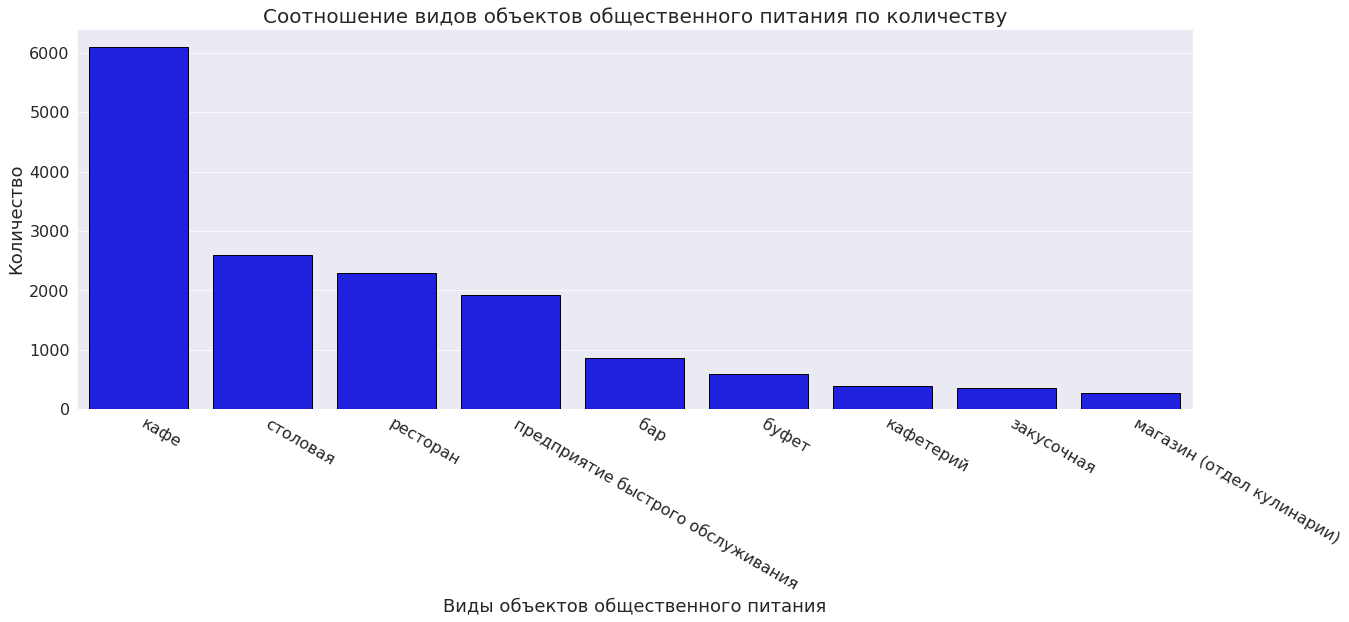

In [20]:
plt.figure(figsize=(20, 7))
sns.set_style("darkgrid")
plt.xticks(rotation=-30, ha='left')
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x="object_type", y="count", color = 'blue', ec='black', data=df_type)
plt.xlabel('Виды объектов общественного питания',  fontsize='18')
plt.ylabel('Количество',  fontsize='18')
plt.title('Cоотношение видов объектов общественного питания по количеству', fontsize='20')

Исходя из графика мы видим, что на сегодняшний день наибольшей популярностью пользуются 4 вида объектов обественного питания. такие, как кафе, столовые, рестораны и предприятия быстрого обслуживания. Подобные результаты кажутся данные правдивыми, т.к. эти 4 вида объектов питания предоставляют, грубо говоря весь рацион, там можно и принять полноценный прием пищи и закусить и выпить, а остальные 5 предосталяют более узкоспециализированную продукцию.

#### Исследуем соотношение сетевых и несетевых заведений по количеству:

In [21]:
df_chain = rest.groupby('chain', as_index=False).agg({'id': 'count'}).sort_values('id', ascending = False)
df_chain.columns = ['chain', 'count']

In [22]:
df_chain

,chain,count
1,нет,12398
0,да,2968


Text(0.5, 1.0, 'Cоотношение сетевых и несетевых заведений по количеству')

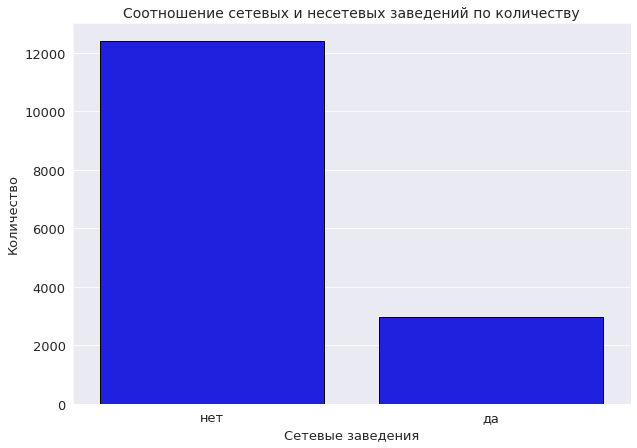

In [23]:
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=13)
sns.barplot(x="chain", y="count", color = 'blue', ec='black', data=df_chain)
plt.xlabel('Cетевые заведения',  fontsize='13')
plt.ylabel('Количество',  fontsize='13')
plt.title('Cоотношение сетевых и несетевых заведений по количеству', fontsize=14)

Не сетевых заведений больше, чем сетевых, возможно люди хотят какой-то независимости в бизнесе и не желают иметь какую-то связть с сетевыми заведениями , поэтому решают сделать что-то свое

#### Для какого вида объекта общественного питания характерно сетевое распространение?

Для начала найдем количество сетевых заведений и по типу заведения:

In [24]:
df_chain_yes = rest.query('chain == "да"')

In [25]:
df_chain_yes = df_chain_yes.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values('id', ascending = False)
df_chain_yes.columns = ['object_type', 'count_new']

In [26]:
df_chain_yes

,object_type,count_new
3,кафе,1396
6,предприятие быстрого обслуживания,791
7,ресторан,544
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,52
0,бар,37
1,буфет,11
8,столовая,3


Объединим эти данные с данными, которые мы получили выше по соотношению видов объектов общественного питания по количеству 

In [27]:
df_new = df_chain_yes.merge(df_type, on='object_type')

Найдем долю сетевых заведений к общему числу для каждого типа заведения:

In [28]:
df_new['ratio'] = (df_new['count_new'] /  df_new['count']).round(2)

In [29]:
df_new = df_new.sort_values('ratio', ascending = False)
df_new = df_new[['object_type', 'ratio']]

In [30]:
df_new

,object_type,ratio
1,предприятие быстрого обслуживания,0.41
3,магазин (отдел кулинарии),0.29
2,ресторан,0.24
0,кафе,0.23
4,закусочная,0.16
5,кафетерий,0.13
6,бар,0.04
7,буфет,0.02
8,столовая,0.00


Text(0.5, 1.0, 'Сетевое распространение по типу заведения')

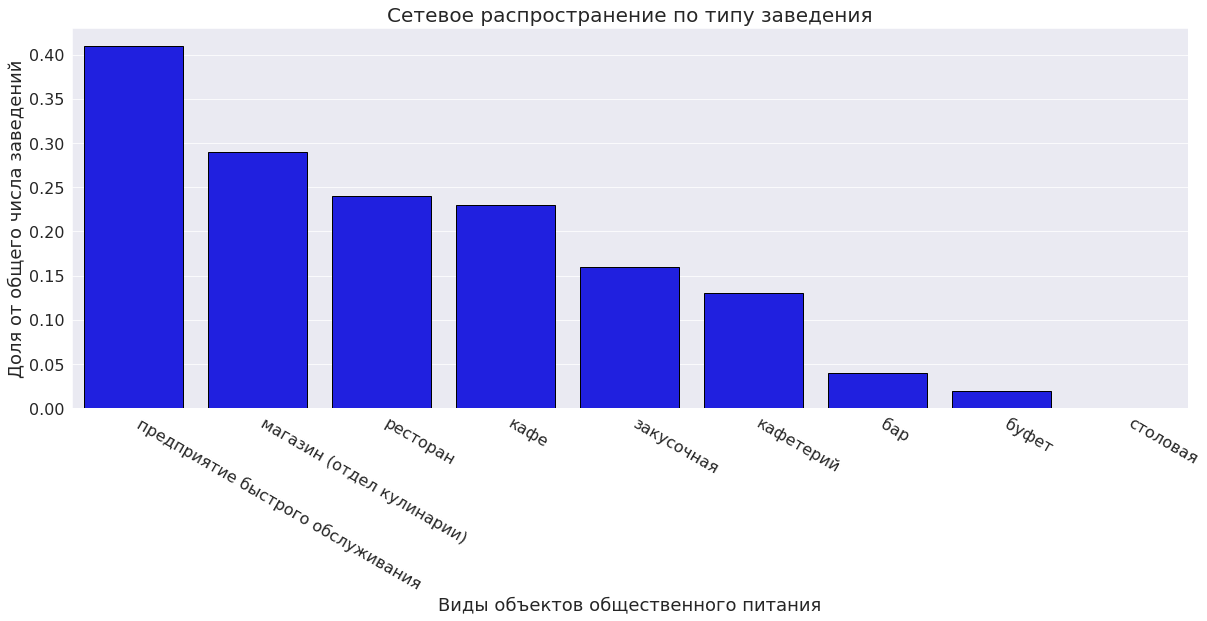

In [31]:
plt.figure(figsize=(20, 7))
sns.set_style("darkgrid")
plt.xticks(rotation=-30, ha='left')
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x="object_type", y="ratio", color = 'blue', ec='black', data=df_new)
plt.xlabel('Виды объектов общественного питания',  fontsize='18')
plt.ylabel('Доля от общего числа заведений',  fontsize='18')
plt.title('Сетевое распространение по типу заведения', fontsize='20')

Наиболее сетевыми являются предприятия быстрого обслуживания, далее мы имеем постепенно нисходящее по количеству сетевых заведений типа магазин, ресторан, кафе, запусочная. И совсем мало заведений, принадлежащих сети это буфеты, соловые и бары.


#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [32]:
df_chain_yes = rest.query('chain == "да"')
df_chain_yes

,id,object_name,chain,object_type,address,number,new
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,алло пицца
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,суши wok
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,тануки
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,шоколадница
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,шоколадница


Сгруппируем по количеству заведений и посадочным местам:

In [33]:
df_chain_yes = df_chain_yes.groupby('new').agg({'id': 'count', 'number': 'median'}).round().sort_values('id', ascending = False).reset_index()

In [34]:
df_chain_yes = df_chain_yes.query('id > 1')

In [35]:
df_chain_yes.head(10)

,new,id,number
0,шоколадница,183,50.0
1,kfc,171,48.0
2,макдоналдс,165,79.0
3,бургер кинг,144,45.0
4,теремок,106,24.0
5,домино'с пицца,97,16.0
6,крошка картошка,92,15.0
7,суши wok,75,6.0
8,милти,72,0.0
9,папа джонс,65,20.0


In [36]:
df_chain_yes['number'].median()

42.0

Text(0.5, 1.0, 'Гистрограмма распределения')

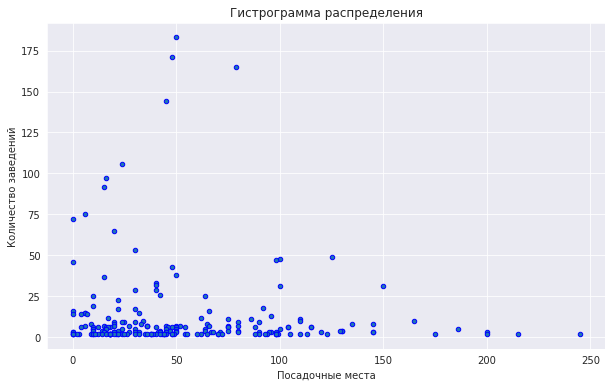

In [37]:
ax = df_chain_yes.plot(x='number', y='id',ec='blue', kind='scatter', figsize=(10,6))
ax.set_ylabel("Количество заведений")
ax.set_xlabel("Посадочные места")
ax.set_title('Гистрограмма распределения')

По гистограмме мы видим, что наибольшая плотность точек на графике находится при небольшом числе сетевых заведений. Если рассматривать медиальное значение посадочных мест, как границу между понятием большое и маленькое число посадочных мест, то мы имеем много значений с малым количество заведений в сети при большом количестве посадочных мест. И таких значений больше, нежели тех, что имеют много заведений при небольшом количестве посадочных мест

#### Для каждого вида объекта общественного питания опишим среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?


In [38]:
df_mean = rest.groupby('object_type', as_index=False).agg({'number': 'mean'}).round(0)

In [39]:
df_mean = df_mean.sort_values('number', ascending = False)

In [40]:
df_mean 

,object_type,number
8,столовая,130.0
7,ресторан,97.0
1,буфет,51.0
0,бар,43.0
3,кафе,40.0
6,предприятие быстрого обслуживания,21.0
4,кафетерий,9.0
2,закусочная,8.0
5,магазин (отдел кулинарии),6.0


Text(0.5, 1.0, 'Cреднее количество посадочных мест')

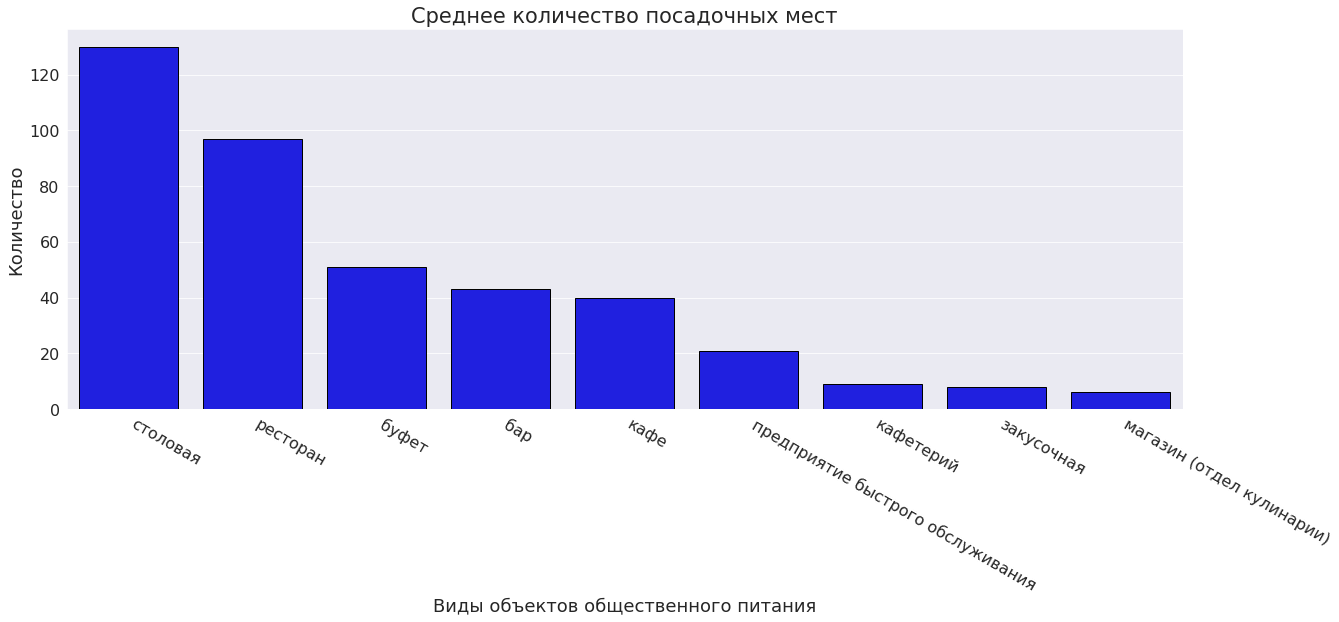

In [41]:
plt.figure(figsize=(20, 7))
sns.set_style("darkgrid")
plt.xticks(rotation=-30, ha='left')
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x="object_type", y="number", color = 'blue', ec='black', data=df_mean)
plt.xlabel('Виды объектов общественного питания',  fontsize='18')
plt.ylabel('Количество',  fontsize='18')
plt.title('Cреднее количество посадочных мест', fontsize='21')

Наибольшее количество посадочных мест имеют столовые, рестораны, далее следует группа из буфетов, баров и кафе и следом идут, обычно небольшие заведения, которые в основном не занимают больших территорий это закусочные, кафетерии и отделы кулинарии 

#### Выделите в отдельный столбец информацию об улице из столбца address. Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [42]:
rest.head()

,id,object_name,chain,object_type,address,number,new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель


Приведем столбец address к формату, чтобы в нем выводилось только название улицы, проспекта и т.д., тип же мы вынесем в соседний столбец type. Для этого напишем функцию:

In [43]:
rest['street'] = ''
rest['type'] = ''
def streets(row):
    address = row[4]
    address = address.split(', ')
    if  (((address[1].count('поселение') > 0) | 
          (address[1].count('поселок') > 0) |
          (address[1].count('деревня') > 0) |
          (address[1].count('город') > 0)) & 
         (len(address)>2)):
        address[1] = address[2]
    street = address[1]
    words = street.split(' ')
    for n_word in range(len(words)):
        if ((words[n_word] == 'аллея') | (words[n_word] == 'бульвар') | (words[n_word] == 'квартал') |
            (words[n_word] == 'линия') | (words[n_word] == 'микрорайон') | (words[n_word] == 'мост') |
            (words[n_word] == 'набережная') | (words[n_word] == 'парк') | (words[n_word] == 'переулок') |
            (words[n_word] == 'площадь') | (words[n_word] == 'проезд') | (words[n_word] == 'проектируемый проезд') | 
            (words[n_word] == 'просека') | (words[n_word] == 'проспект') | (words[n_word] == 'тупик') |
            (words[n_word] == 'шоссе') | (words[n_word] == 'улица')):
            row[8] = words[n_word]
            words[n_word] = ''
        words[n_word] = words[n_word] + ' '
        
        
        
    street = "".join(words)
    street = street.lstrip()
    street = street.rstrip() 
    row[7] = street        
    return row

In [44]:
rest = rest.apply(streets, axis=1)

Объедним таблицу rest c таблицей streets:

In [45]:
streets = pd.read_excel("Newtest.xlsx")

In [46]:
district = rest.merge(streets, on='street')

In [47]:
district.head(10)

,id,object_name,chain,object_type,address,number,new,street,type,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,Егора Абакумова,улица,Ярославкий район
1,193477,grill-house,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,grill-house,Егора Абакумова,улица,Ярославкий район
2,196756,пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,пекарня,Егора Абакумова,улица,Ярославкий район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,Талалихина,улица,Нижегородский район
4,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,Талалихина,улица,Таганский район
5,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,даиси,Талалихина,улица,Нижегородский район
6,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,даиси,Талалихина,улица,Таганский район
7,24739,бар варвар,нет,кафе,"город Москва, улица Талалихина, дом 35",45,варвар,Талалихина,улица,Нижегородский район
8,24739,бар варвар,нет,кафе,"город Москва, улица Талалихина, дом 35",45,варвар,Талалихина,улица,Таганский район
9,29171,моск. университет прикладной биотехнологии,нет,столовая,"город Москва, улица Талалихина, дом 33, строен...",22,моск. университет прикладной биотехнологии,Талалихина,улица,Нижегородский район


Найдем топ-10 улиц по количеству объектов общественного питания

In [48]:
rest_top10 = district.groupby('street').agg({'id': 'nunique'}).sort_values('id', ascending = False).reset_index()

In [49]:
rest_top10.head(10)

,street,id
0,Мира,204
1,Профсоюзная,182
2,Ленинградский,171
3,Пресненская,167
4,Варшавское,164
5,Ленинский,147
6,Вернадского,132
7,Кутузовский,114
8,Каширское,112
9,Кировоградская,110


In [50]:
rest_top = rest_top10.query('id > 109')

Text(0.5, 1.0, 'Топ-10 улиц по количеству объектов общественного питания')

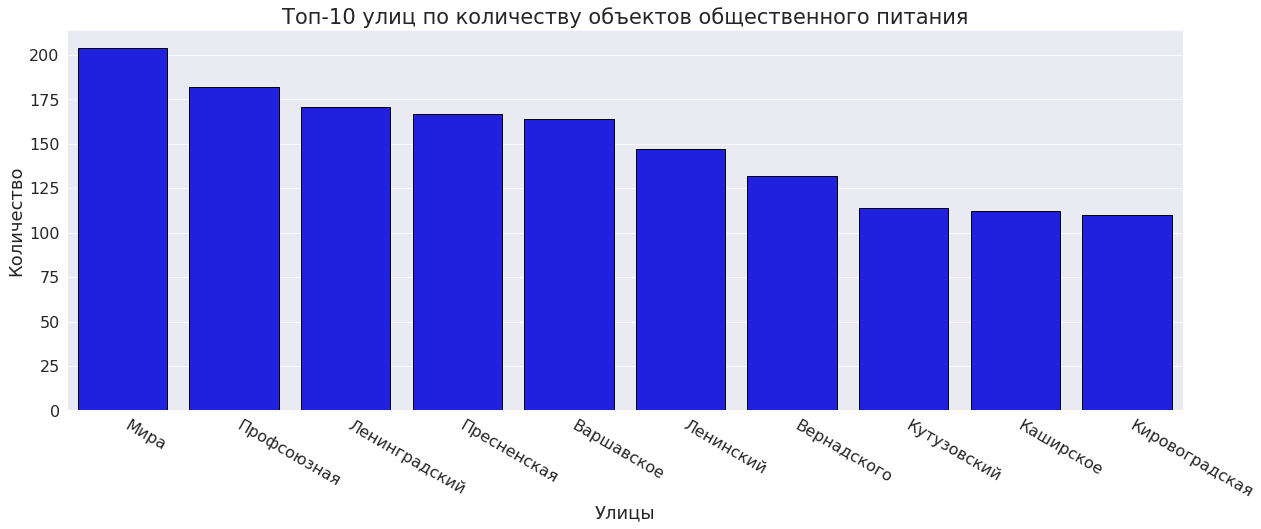

In [51]:
plt.figure(figsize=(20,7))
sns.set_style("darkgrid")
plt.xticks(rotation=-30, ha='left')
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x="street", y="id", color = 'blue', ec='black', data=rest_top)
plt.xlabel('Улицы',  fontsize='18')
plt.ylabel('Количество',  fontsize='18')
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize='21')

Добавим к улицам соответствующие районы:

In [52]:
rest_top10 = district.groupby(['street', 'type', 'district']).agg({'id': 'nunique'}).sort_values('id', ascending = False).reset_index()

In [53]:
rest_top10.head(45)

,street,type,district,id
0,Мира,проспект,Район Внуково,204
1,Мира,проспект,Ярославкий район,204
2,Мира,проспект,Останкинский район,204
3,Мира,проспект,Алексеевский район,204
4,Профсоюзная,улица,Обруческий район,182
5,Профсоюзная,улица,Район Черемушки,182
6,Профсоюзная,улица,Академический район,182
7,Профсоюзная,улица,Район Теплый Стан,182
8,Профсоюзная,улица,Район Коньково,182
9,Профсоюзная,улица,Район Ясенево,182


Заметим, что большинство топ-10 улиц распологается сразу в нескольких районах, возможно как раз из-за большого территориального охвата, а седовательно больших возможностей размещения объектов общественного питания эти улицы и выбились в лидеры

#### Найдем число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

Сгруппируем данные:

In [54]:
rest_1 = district.groupby(['street', 'district']).agg({'id': 'nunique'}).sort_values('id')

Найдем улицы с 1 объектов общественного питания:

In [55]:
rest_1 = rest_1.query('id == 1').reset_index()

In [56]:
rest_1

,street,district,id
0,Яхромская,Дмитровский район,1
1,Мирской,Савеловский район,1
2,Миусская,Тверской район,1
3,Михневский,Район Восточное Бирюлево,1
4,Мишина,Савеловский район,1
...,...,...,...
439,Челюскинская,Лисиноостровский район,1
440,Чуксин,Тимирязевский район,1
441,Академика Комарова,Район Марфино,1
442,Хользунова,Район Хамовники,1


Сгруппируем по районам и найдем топ-10 районов, на улицах которых находится всего по одному объекту объекту общественного питания:

In [57]:
rest_1 = rest_1.groupby('district').agg({'id': 'sum'}).sort_values('id', ascending = False).reset_index()

In [58]:
rest_1.head(10)

,district,id
0,Басманный район,25
1,Таганский район,23
2,Район Хамовники,21
3,Пресненский район,18
4,Арбат,16
5,Мещанский район,15
6,Тверской район,15
7,Район Соколиная гора,11
8,Район Лефортово,11
9,Район Внуково,9


In [59]:
rest_11 = rest_1.query('id > 8')

Text(0.5, 1.0, 'Топ-10 районов Москвы с одним объектом общественного питания')

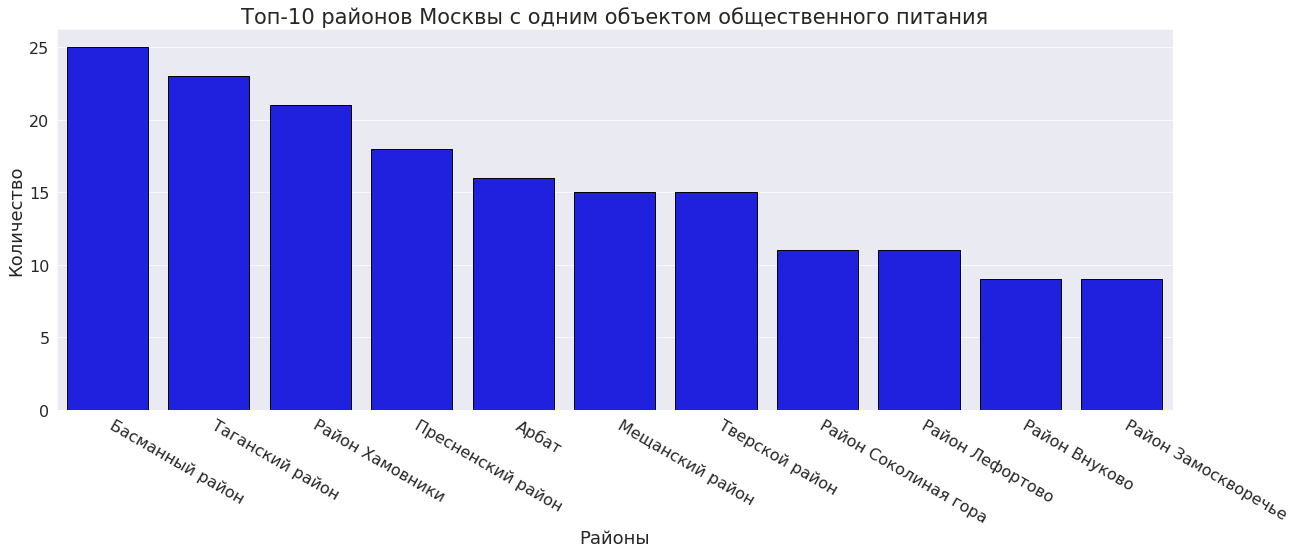

In [60]:
plt.figure(figsize=(20,7))
sns.set_style("darkgrid")
plt.xticks(rotation=-30, ha='left')
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x="district", y="id", color = 'blue', ec='black', data=rest_11)
plt.xlabel('Районы',  fontsize='18')
plt.ylabel('Количество',  fontsize='18')
plt.title('Топ-10 районов Москвы с одним объектом общественного питания', fontsize='21')

#### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [61]:
rest

,id,object_name,chain,object_type,address,number,new,street,type
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,Егора Абакумова,улица
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,Талалихина,улица
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия,Абельмановская,улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская,улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель,Абрамцевская,улица
...,...,...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница,3-й Крутицкий,переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница,Земляной Вал,улица
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,шоколадница,Земляной Вал,улица
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,шоколадница,Киевское,шоссе


Сгруппируем данные:

In [62]:
rest_2 = rest.groupby(['street', 'type']).agg({'id': 'count', 'number': 'mean'}).sort_values('id', ascending = False).round().reset_index()

In [63]:
rest_2.head(20)

,street,type,id,number
0,Мира,проспект,204,63.0
1,Профсоюзная,улица,182,46.0
2,Ленинградский,проспект,171,53.0
3,Пресненская,набережная,167,46.0
4,Варшавское,шоссе,164,52.0
5,Ленинский,проспект,147,63.0
6,Вернадского,проспект,132,67.0
7,Кутузовский,проспект,114,85.0
8,Каширское,шоссе,112,55.0
9,Кировоградская,улица,110,60.0


Рассмотрим топ-20 улиц

In [64]:
rest_2 = rest_2.query('id > 78')

Text(0.5, 32.99999999999995, 'Количество объектов')

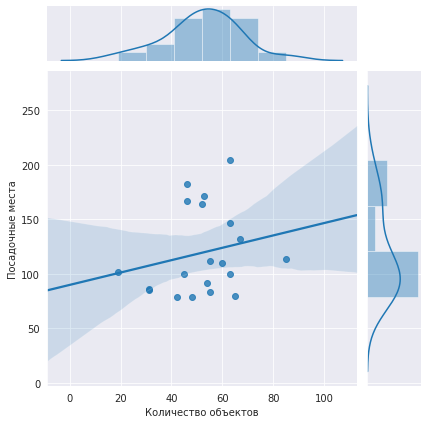

In [65]:
sns.jointplot(x='number', y='id', data=rest_2, kind='reg')
plt.ylabel('Посадочные места')
plt.xlabel('Количество объектов')

 Найдем коэффициент корреляции Пирсона для того, чтобы понять как связаны величины

In [66]:
print(rest_2['number'].corr(rest_2['id']))

0.21302298344921441


Корреляция в 0,21 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение числа заведений сопровождается прибавкой в числа посадочных, но так бывает не всегда.

### Вывод:
- Наибольшей популярностью пользуются кафе, столовые, рестораны, предприятия быстрого обслуживания

- Преобладание на рынке не сетевых заведений общественного питания

- Наиболее сетевыми являются предприятия быстрого обслуживания

- Наибольшее количество посадочных мест имеют столовые и рестораны

- Топ-10 улиц по объектам общественного питания: Проспект Мира,  Профсоюзная улица,  Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица

- Топ-10 районов с одним объектом общественного питания: Басманный, Таганский, Хамовники, Пресненский, Арбат, Мещанский, Тверской, Соколиная гора, Лефортово, Внуково

- Увеличение числа заведений сопровождается прибавкой в числа посадочных, но так бывает не всегда
